In [3]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# stats models: regression fitting
import statsmodels.formula.api as smf
# data visualization
import seaborn as sns

# 2.1 (Sleep equation)

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


<AxesSubplot:xlabel='totwrk', ylabel='sleep'>

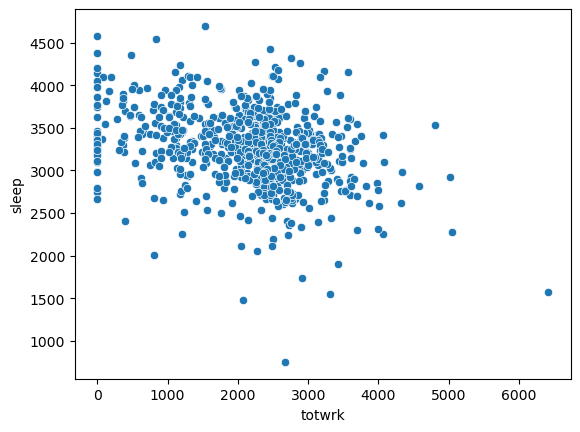

In [5]:
sns.scatterplot(data=df, y='sleep', x='totwrk')

Подогнанная прямая


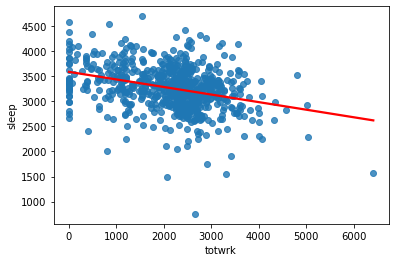

In [7]:
sns.regplot(data=df, y='sleep', x='totwrk', ci=None, line_kws={"color": "r"})
print('Подогнанная прямая')

In [7]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~totwrk', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    3586.38
totwrk         -0.15
dtype: float64

In [15]:
# подгонка прямой, (-1) - чтобы убрать коэффициент b0
fitted_lin = smf.ols(formula='sleep~-1+(totwrk)', data=df).fit()
# коэффициенты с округлением
fitted_lin.params.round(2)

totwrk    1.26
dtype: float64

# Пример 2.1.2


<AxesSubplot:xlabel='age', ylabel='sleep'>

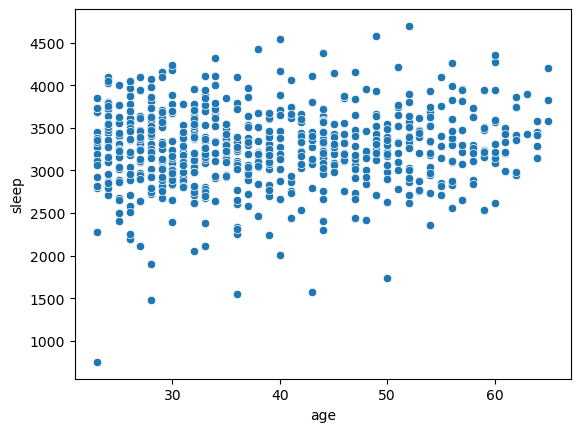

In [17]:
sns.scatterplot(data=df, y='sleep', x='age')

<AxesSubplot:xlabel='age', ylabel='sleep'>

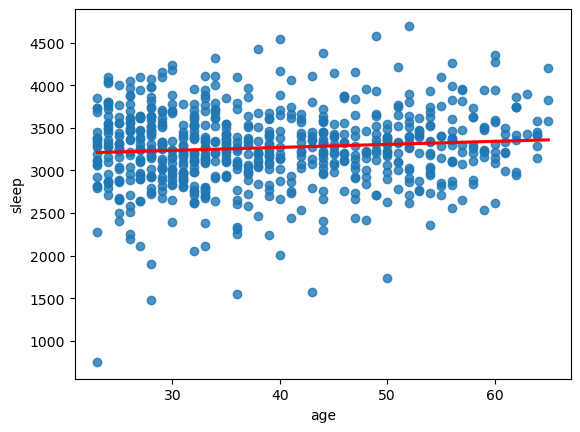

In [18]:
sns.regplot(data=df, y='sleep', x='age', ci=None, line_kws={"color": "r"})

In [20]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~age', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    3128.91
age             3.54
dtype: float64

In [21]:
# подгонка прямой, (-1) - чтобы убрать коэффициент b0
fitted_lin = smf.ols(formula='sleep~-1+(age)', data=df).fit()
# коэффициенты с округлением
fitted_lin.params.round(2)

age    77.82
dtype: float64

# Пример 2.1.3

<AxesSubplot:xlabel='totwrk', ylabel='sleep'>

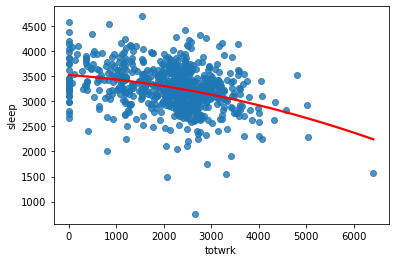

In [9]:
sns.regplot(data=df, y='sleep', x='totwrk', order=2, ci=None, line_kws={"color": "r"})

In [24]:
# подгонка параболы
fitted_pol = smf.ols(formula='sleep~totwrk+I(totwrk**2)', data=df).fit()
# коэффициенты с округлением
fitted_pol.params.round(2)

Intercept         3523.59
totwrk              -0.07
I(totwrk ** 2)      -0.00
dtype: float64

# Пример 2.1.4

<AxesSubplot:xlabel='age', ylabel='sleep'>

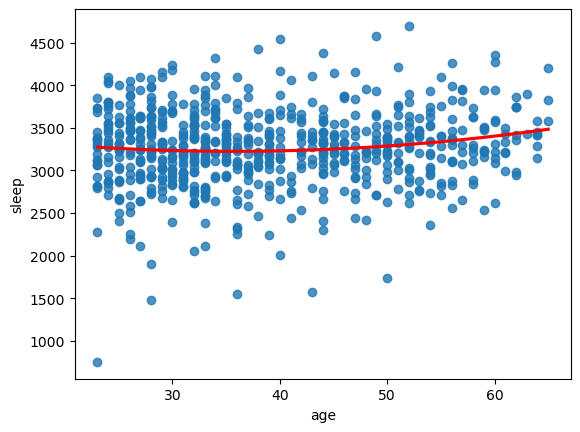

In [27]:
sns.regplot(data=df, y='sleep', x='age', order=2, ci=None, line_kws={"color": "r"})

In [30]:
# подгонка параболы
fitted_pol = smf.ols(formula='sleep~age+I(age**2)', data=df).fit()
# коэффициенты с округлением
fitted_pol.params.round(2)

Intercept      3608.03
age             -21.49
I(age ** 2)       0.30
dtype: float64

# Пример 2.1.5

In [13]:
fitted_plane = smf.ols(formula='sleep~totwrk+age',data=df).fit()
fitted_plane.params.round(2)

Intercept    3469.20
totwrk         -0.15
age             2.92
dtype: float64

# Пример 2.2.1

In [14]:
df_lab = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv')
df_lab

,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709
...,...,...,...,...
564,2.625403,20,1.424376,33.477545
565,1.276386,61,2.109048,26.300732
566,1.953869,117,6.241870,41.153979
567,1.318527,46,7.902237,66.720139


<AxesSubplot:xlabel='capital', ylabel='output'>

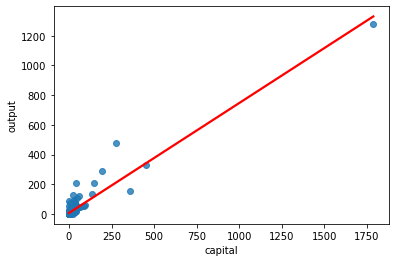

In [16]:
sns.regplot(data=df_lab, x='capital', y='output', order=1, ci=0, line_kws={"color": "r"})

In [19]:
# подгонка параболы
fitted_pol = smf.ols(formula='output~capital', data=df_lab).fit()
# коэффициенты с округлением
fitted_pol.params.round(2)

Intercept    6.19
capital      0.74
dtype: float64

In [20]:
# подгонка параболы
fitted_pol = smf.ols(formula='output~-1+capital', data=df_lab).fit()
# коэффициенты с округлением
fitted_pol.params.round(2)

capital    0.75
dtype: float64

<AxesSubplot:xlabel='capital', ylabel='output'>

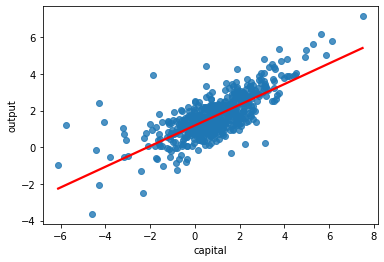

In [17]:
sns.regplot(x=np.log(df_lab['capital']), y=np.log(df_lab['output']), order=1, ci=None, line_kws={"color": "r"})

In [40]:
# подгонка прямой, I - в какую степень возвести логарифм, ~  показывает, что от чего зависит
fitted_polynom = smf.ols(formula='np.log(output)~np.log(capital)', data=df_lab).fit()
# коэффициенты с округлением
fitted_polynom.params.round(2)

Intercept          1.19
np.log(capital)    0.56
dtype: float64

In [41]:
# подгонка прямой, I - в какую степень возвести логарифм, ~  показывает, что от чего зависит
fitted_polynom = smf.ols(formula='np.log(output)~-1+np.log(capital)', data=df_lab).fit()
# коэффициенты с округлением
fitted_polynom.params.round(2)

np.log(capital)    0.88
dtype: float64

# Пример 2.2.2

<AxesSubplot:xlabel='labour', ylabel='output'>

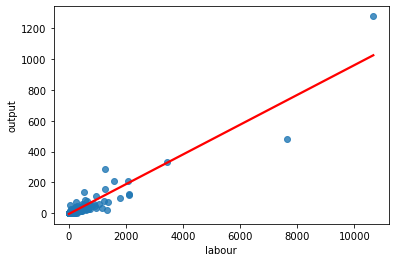

In [21]:
sns.regplot(data=df_lab, x='labour', y='output', order=1, ci=0, line_kws={"color": "r"})

In [45]:
# подгонка прямой, I - в какую степень возвести логарифм, ~  показывает, что от чего зависит
fitted_line = smf.ols(formula='output~labour', data=df_lab).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept   -4.72
labour       0.10
dtype: float64

In [46]:
# подгонка прямой, I - в какую степень возвести логарифм, ~  показывает, что от чего зависит
fitted_line = smf.ols(formula='output~-1+labour', data=df_lab).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

labour    0.09
dtype: float64

<AxesSubplot:xlabel='labour', ylabel='output'>

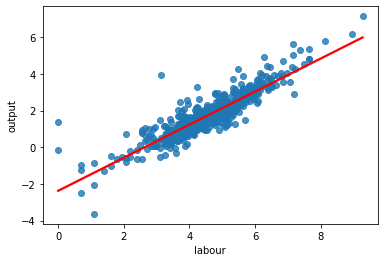

In [26]:
sns.regplot(data=df_lab, x=np.log(df_lab['labour']), y=np.log(df_lab['output']), order=1, ci=None, line_kws={"color":"r"})

In [47]:
# подгонка прямой, I - в какую степень возвести логарифм, ~  показывает, что от чего зависит
fitted_polynom = smf.ols(formula='np.log(output)~np.log(labour)', data=df_lab).fit()
# коэффициенты с округлением
fitted_polynom.params.round(2)

Intercept        -2.38
np.log(labour)    0.90
dtype: float64

In [27]:
# подгонка прямой, I - в какую степень возвести логарифм, ~  показывает, что от чего зависит
fitted_polynom = smf.ols(formula='np.log(output)~-1+np.log(labour)', data=df_lab).fit()
# коэффициенты с округлением
fitted_polynom.params.round(2)

np.log(labour)    0.41
dtype: float64

# Пример 2.2.3

<AxesSubplot:xlabel='capital', ylabel='output'>

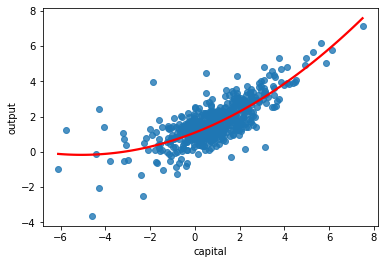

In [31]:
sns.regplot(x=np.log(df_lab['capital']), y=np.log(df_lab['output']), order=2, ci=None, line_kws={"color": "r"})

In [32]:
# подгонка прямой, I - в какую степень возвести логарифм, ~  показывает, что от чего зависит
fitted_polynom = smf.ols(formula='np.log(output)~np.log(capital)+I(np.log(capital)**2)', data=df_lab).fit()
# коэффициенты с округлением
fitted_polynom.params.round(2)

Intercept                  1.09
np.log(capital)            0.50
I(np.log(capital) ** 2)    0.05
dtype: float64

# Пример 2.2.4

<AxesSubplot:xlabel='labour', ylabel='output'>

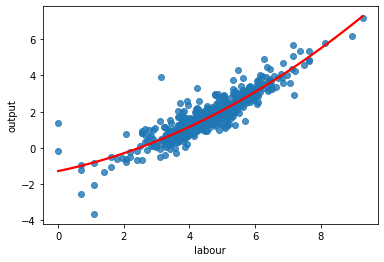

In [34]:
sns.regplot(x=np.log(df_lab['labour']), y=np.log(df_lab['output']), order=2, ci=None, line_kws={"color": "r"})

In [35]:
# подгонка прямой, I - в какую степень возвести логарифм, ~  показывает, что от чего зависит
fitted_polynom = smf.ols(formula='np.log(output)~np.log(labour)+I(np.log(labour)**2)', data=df_lab).fit()
# коэффициенты с округлением
fitted_polynom.params.round(2)

Intercept                -1.28
np.log(labour)            0.37
I(np.log(labour) ** 2)    0.06
dtype: float64

# ----------------------------------------------------------------------------------

In [36]:
import IPython.display
from IPython.display import Image

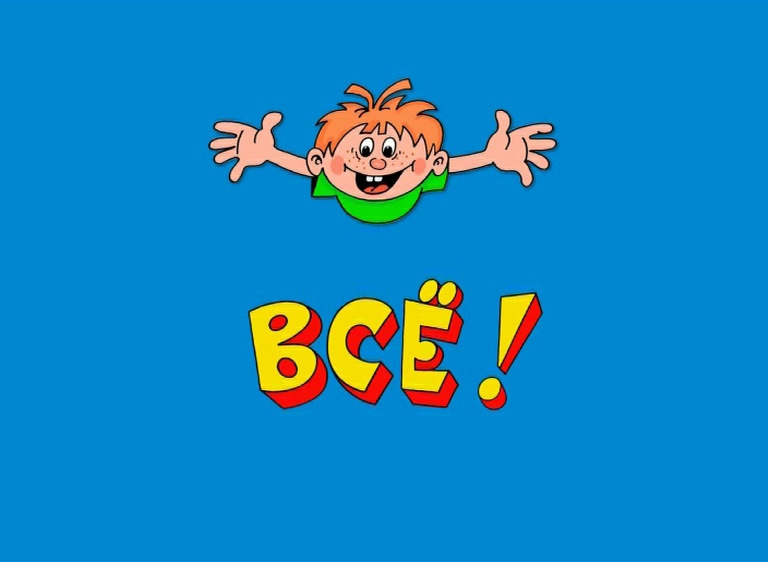

In [38]:
Image("E:\Рабочий стол\\1631718415149786766.jpg")